0
(180600,)
1
(180600,)
2
(180600,)
3
(180600,)
4
(180600,)
5
0
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])
tensor([[0.4570, 0.4642, 0.4717,  ..., 0.4820, 0.4820, 0.4820],
        [0.5045, 0.4948, 0.4887,  ..., 0.4820, 0.4820, 0.4820]],
       grad_fn=<SqueezeBackward0>)
tensor(0.6760, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.8325021266937256
1
tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.3911, 0.3876, 0.3883,  ..., 0.3792, 0.3792, 0.3792],
        [0.4240, 0.4165, 0.4070,  ..., 0.3818, 0.3822, 0.3824]],
       grad_fn=<SqueezeBackward0>)
tensor(0.5595, grad_fn=<MeanBackward0>)
Time Taken for Step = 1.7034151554107666
2
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0.3126, 0.2928, 0.2814,  ..., 0.0966, 0.0974, 0.0982],
        [0.3556, 0.3290, 0.2944,  ..., 0.2563, 0.2520, 0.2441]],
       grad_fn=<SqueezeBackward0>)
tensor(0.7719, grad_fn=<MeanBackwar

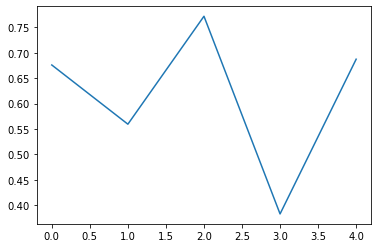

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchaudio
import sys
import torch
import numpy as np
import pandas as pd
import os
import pickle
import re
import torchaudio.transforms as T
import math
import librosa
import librosa.display
import matplotlib.patches as patches
from glob import glob
import util
from util import audio_file
from util import *
from Losses import FocalLoss,WeightedFocalLoss
from StackedLSTM2 import StackedLSTM
from AttentionLSTM import Attention_LSTM
from Toy_Model import ToyModel
import time
torch.manual_seed(1)

my_dataset = "BPC"
my_model = "Vanilla_LSTM"
verbose = 1

if my_dataset == "ATC0":
    input_list, labels_list = process_atc0_files()
    
elif my_dataset == "BPC":
    input_list, labels_list = load_data_limit(5)

n_samples = input_list.size()[0]
train_split = 4*n_samples//5
test_samples = n_samples - train_split
    
test_input_list = input_list[train_split:]
test_labels_list = labels_list[train_split:]
input_list = input_list[:train_split]
labels_list = labels_list[:train_split]

if my_model == "Attention_LSTM":
    model = Attention_LSTM()
    save_filepath = '/project/graziul/ra/ajays/LSTM_model_predictions.txt'
elif my_model == "Vanilla_LSTM":
    model = ToyModel()
    save_filepath = '/project/graziul/ra/ajays/toy_model_predictions.txt'
loss_fn = FocalLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
fer_list = []
train_loss_list = []
test_loss_list = []
sample_size = 30
batch_size = model.batch_size
num_samples = input_list.size()[0]//batch_size
training_steps = 5
idx = 0
flag = 0
num_segments = 30
val_size = 30

for step in range(training_steps):
    start_time = time.time()
    input_batch = input_list[idx*batch_size:(idx+1)*batch_size]
    labels_batch = labels_list[idx*batch_size:(idx+1)*batch_size]
    idx = (idx+1)%num_samples
    print(step)
    optimizer.zero_grad()
    output_hat = model(input_batch)
    #print(output_hat)
    print(labels_batch)
    print(output_hat)
    loss = loss_fn(output_hat, labels_batch)
    loss.backward()
    #for param in model.parameters():
    #    print(param.grad)
    print(loss)
    train_loss_list.append(loss.item())
    optimizer.step()
    end_time = time.time()
    step_time = end_time - start_time
    print("Time Taken for Step = " + str(step_time))
    
plt.plot(list(range(training_steps)),train_loss_list)
plt.savefig('LSTM_model_training.png')


In [1]:
#Threshold on ATC0
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torchaudio
import sys
import torch
import numpy as np
import pandas as pd
import os
import pickle
import re
import torchaudio.transforms as T
import math
import librosa
import librosa.display
import matplotlib.patches as patches
from glob import glob
import util
from util import audio_file
from util import *
from Losses import FocalLoss,WeightedFocalLoss
from StackedLSTM2 import StackedLSTM
from AttentionLSTM import Attention_LSTM
from Toy_Model import ToyModel
import time

zcr_list = []
rms_list = []
autocorrelation_list = []
labels_list = []
audio_file_arr = []
frame_size = 25
frame_hop = 10
idx = 0
transcript_list_arr = []
min_zcr_t = 0
min_rms_t = 0
max_zcr_t = 10
max_rms_t = 10
zcr_t_arr = np.linspace(min_zcr_t,max_zcr_t,20)
#zcr_threshold = 1
rms_t_arr = np.linspace(min_rms_t,max_rms_t,20)

input_list = []
labels_list = []
txtfile = open('/project/graziul/ra/ajays/stats_atc0.txt','w')
txtfile.truncate(0)
#paths = ['/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/', '/project/graziul/data/corpora/atc0_comp/atc0_dca/data/audio/', '/project/graziul/data/corpora/atc0_comp/atc0_dfw/data/audio/']
paths = ['/project/graziul/data/corpora/atc0_comp/atc0_bos/data/audio/']
for idx,path in enumerate(paths):
    for fpath in glob(path + '*.sph'):
        if(idx > k):
            break
        filename = fpath[-12:-4]
        label_file = path[:-6] + 'transcripts/' + filename + '.txt'
        waveform, sample_rate = torchaudio.load(file_name)
        effects = [['rate', '22050']]
        x,sr = torchaudio.sox_effects.apply_effects_tensor(waveform, sample_rate, effects)
        with open(label_file, 'r') as f:
            label = f.read()
        y = process_atc_label_line(label)
        
        input_list.append(x)
        labels_list.append(y)
        idx = idx+1
        zcr = np.array(np.squeeze(get_zcr(x,sr, frame_length=sr*frame_size,hop_length=sr*frame_hop)))
        zcr_list.append(zcr)
        rms = np.array(np.squeeze(librosa.feature.rms(x,frame_length=sr*frame_size,hop_length=sr*frame_hop)))
        rms_list.append(rms)
        get_plots(x,zcr,rms)
        frame_error_rate_list = []
        for zcr_threshold in zcr_t_arr:
            for rms_threshold in rms_t_arr:
                frame_error_rate = process_single_file(x,label,sr,zcr_threshold,rms_threshold)
                frame_error_rate_list.append(frame_error_rate)
                writeline = audio_file + ' ' + str(zcr_threshold) + ' ' + str(rms_threshold) + ' ' + str(frame_error_rate) + '\n'
                txtfile.write(writeline)
        frame_error_rate_list = np.array(frame_error_rate_list)
        get3dplots(frame_error_rate_list, zcr_t_arr, rms_t_arr,idx)       
        
    if(idx>k):
        break

NameError: name 'k' is not defined